# Loading Package

In [95]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os
import pandas as pd


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

In [2]:

tf.__version__

'2.3.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

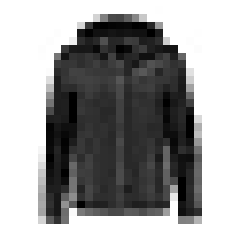

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

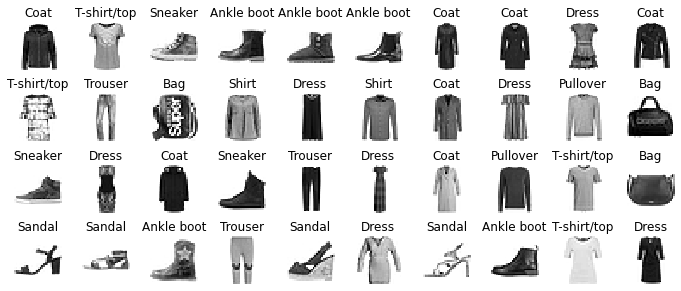

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Construct a Model

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
keras.backend.clear_session()
np.random.seed(42)

In [7]:
model.layers

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:

hidden1 = model.layers[1]
hidden1.name

'dense'

In [19]:
model.get_layer(hidden1.name) is hidden1

True

In [20]:
weights, biases = hidden1.get_weights()

In [21]:

weights

array([[ 0.05280395, -0.06611004, -0.03884185, ..., -0.00162309,
         0.03931017,  0.05281462],
       [-0.0159232 , -0.05562018, -0.02156464, ...,  0.02589228,
        -0.01305208,  0.03571644],
       [ 0.06374596,  0.01347894, -0.01446235, ..., -0.01593326,
         0.02677079,  0.07405709],
       ...,
       [ 0.00974589, -0.03976839,  0.01752548, ...,  0.06967784,
         0.06815369,  0.03497976],
       [ 0.03613483,  0.07337002, -0.0429344 , ...,  0.06380621,
        -0.06032626,  0.0141175 ],
       [-0.02071256, -0.02342661,  0.03991109, ...,  0.00667241,
        -0.02844121,  0.00194149]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

### Compile the Model

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Train the model

In [26]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7216 - accuracy: 0.7602 - val_loss: 0.5177 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4932 - accuracy: 0.8287 - val_loss: 0.4528 - val_accuracy: 0.8478
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4459 - accuracy: 0.8425 - val_loss: 0.4202 - val_accuracy: 0.8512
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4176 - accuracy: 0.8530 - val_loss: 0.3969 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3959 - accuracy: 0.8600 - val_loss: 0.3962 - val_accuracy: 0.8628
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3798 - accuracy: 0.8665 - val_loss: 0.3724 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3648 - accuracy: 0.8712 - val_loss: 0.3686 - val_accuracy:

In [27]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [28]:

print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

In [8]:
import pandas as pd

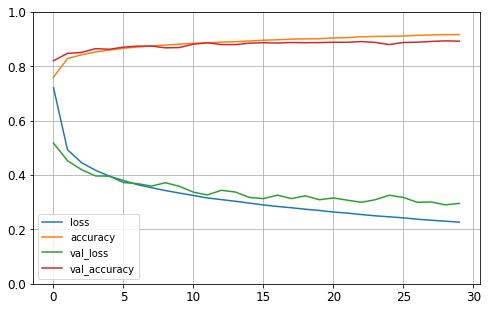

In [30]:


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8840


[0.327216774225235, 0.8840000033378601]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

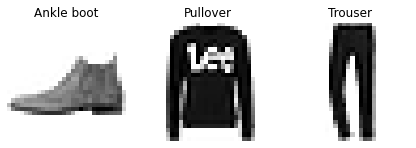

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# **Exercice **


# 1) Plot Learning curves when using different optimizers

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adadelta",
              metrics=["accuracy"])

In [41]:
history_adadelta = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2072 - accuracy: 0.9265 - val_loss: 0.2840 - val_accuracy: 0.8956
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2032 - accuracy: 0.9275 - val_loss: 0.2834 - val_accuracy: 0.8966
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2022 - accuracy: 0.9284 - val_loss: 0.2837 - val_accuracy: 0.8986
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2017 - accuracy: 0.9287 - val_loss: 0.2836 - val_accuracy: 0.8978
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2012 - accuracy: 0.9292 - val_loss: 0.2832 - val_accuracy: 0.8988
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2009 - accuracy: 0.9292 - val_loss: 0.2834 - val_accuracy: 0.8976
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2006 - accuracy: 0.9295 - val_loss: 0.2835 - val_accuracy:

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8870


[0.31423449516296387, 0.8870000243186951]

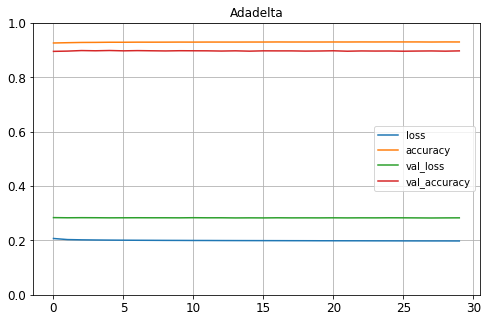

In [43]:
pd.DataFrame(history_adadelta.history).plot(figsize=(8, 5),title=('Adadelta'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [46]:
history_RMSprop = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4314 - accuracy: 0.8495 - val_loss: 0.3889 - val_accuracy: 0.8670
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3693 - accuracy: 0.8698 - val_loss: 0.3763 - val_accuracy: 0.8752
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3518 - accuracy: 0.8769 - val_loss: 0.4031 - val_accuracy: 0.8688
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3425 - accuracy: 0.8818 - val_loss: 0.5488 - val_accuracy: 0.8536
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3367 - accuracy: 0.8854 - val_loss: 0.4429 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3277 - accuracy: 0.8907 - val_loss: 0.4237 - val_accuracy: 0.8808
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3227 - accuracy: 0.8902 - val_loss: 0.3798 - val_accuracy:

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7965 - accuracy: 0.8834


[0.796532392501831, 0.883400022983551]

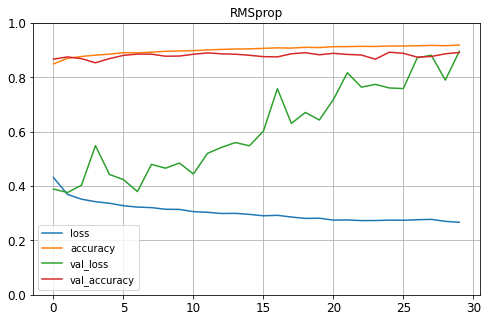

In [48]:

pd.DataFrame(history_RMSprop.history).plot(figsize=(8, 5),title=('RMSprop'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 3 learning curves for optimizers ( "sgd" , Adadelta" and "RMSprop")

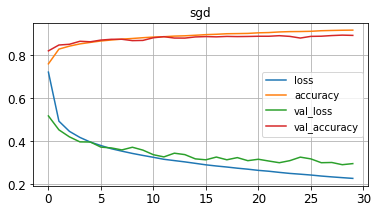

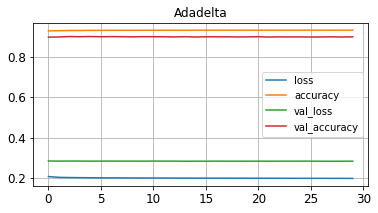

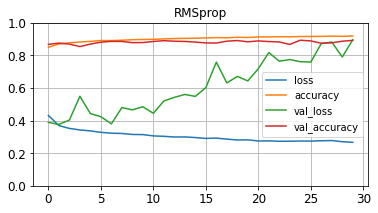

In [84]:
pd.DataFrame(history.history).plot(figsize=(6, 3),title=('sgd'),grid=(True))
pd.DataFrame(history_adadelta.history).plot(figsize=(6, 3),title=('Adadelta'),grid=(True))
pd.DataFrame(history_RMSprop.history).plot(figsize=(6, 3),title=('RMSprop'),grid=(True))
plt.gca().set_ylim(0, 1)
plt.show()

# 2) Plot Learning curves when using different batch size

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [98]:
history_batch10 = model.fit(X_train, y_train, batch_size=10, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.5749 - accuracy: 0.8013 - val_loss: 0.4227 - val_accuracy: 0.8512
Epoch 2/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.4121 - accuracy: 0.8529 - val_loss: 0.3902 - val_accuracy: 0.8642
Epoch 3/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.3696 - accuracy: 0.8664 - val_loss: 0.3546 - val_accuracy: 0.8712
Epoch 4/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.3424 - accuracy: 0.8759 - val_loss: 0.3526 - val_accuracy: 0.8726
Epoch 5/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.3231 - accuracy: 0.8830 - val_loss: 0.3303 - val_accuracy: 0.8784
Epoch 6/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.3074 - accuracy: 0.8873 - val_loss: 0.3239 - val_accuracy: 0.8838
Epoch 7/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.2952 - accuracy: 0.8907 - val_loss: 0.3208 - val_ac

In [99]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8920


[0.33813756704330444, 0.8920000195503235]

In [10]:
history_batch1= model.fit(X_train, y_train, batch_size=1, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
55000/55000 [==============================] - 87s 2ms/step - loss: 0.5148 - accuracy: 0.8109 - val_loss: 0.4693 - val_accuracy: 0.8254
Epoch 2/30
55000/55000 [==============================] - 80s 1ms/step - loss: 0.3952 - accuracy: 0.8526 - val_loss: 0.4258 - val_accuracy: 0.8428
Epoch 3/30
55000/55000 [==============================] - 81s 1ms/step - loss: 0.3573 - accuracy: 0.8657 - val_loss: 0.3829 - val_accuracy: 0.8670
Epoch 4/30
55000/55000 [==============================] - 80s 1ms/step - loss: 0.3372 - accuracy: 0.8752 - val_loss: 0.3813 - val_accuracy: 0.8594
Epoch 5/30
55000/55000 [==============================] - 80s 1ms/step - loss: 0.3170 - accuracy: 0.8815 - val_loss: 0.3194 - val_accuracy: 0.8854
Epoch 6/30
55000/55000 [==============================] - 80s 1ms/step - loss: 0.3053 - accuracy: 0.8859 - val_loss: 0.3082 - val_accuracy: 0.8872
Epoch 7/30
55000/55000 [==============================] - 81s 1ms/step - loss: 0.2898 - accuracy: 0.8907 - val_loss: 0

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4363 - accuracy: 0.8751


[0.4363095164299011, 0.8751000165939331]

In [12]:
history_batch27500 = model.fit(X_train, y_train, batch_size=27500, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
2/2 [==============================] - 1s 352ms/step - loss: 0.2064 - accuracy: 0.9233 - val_loss: 0.3692 - val_accuracy: 0.8872
Epoch 2/30
2/2 [==============================] - 1s 341ms/step - loss: 0.2043 - accuracy: 0.9240 - val_loss: 0.3674 - val_accuracy: 0.8872
Epoch 3/30
2/2 [==============================] - 1s 327ms/step - loss: 0.2023 - accuracy: 0.9247 - val_loss: 0.3657 - val_accuracy: 0.8886
Epoch 4/30
2/2 [==============================] - 1s 328ms/step - loss: 0.2004 - accuracy: 0.9253 - val_loss: 0.3641 - val_accuracy: 0.8888
Epoch 5/30
2/2 [==============================] - 1s 333ms/step - loss: 0.1986 - accuracy: 0.9256 - val_loss: 0.3626 - val_accuracy: 0.8892
Epoch 6/30
2/2 [==============================] - 1s 337ms/step - loss: 0.1969 - accuracy: 0.9262 - val_loss: 0.3611 - val_accuracy: 0.8892
Epoch 7/30
2/2 [==============================] - 1s 328ms/step - loss: 0.1953 - accuracy: 0.9269 - val_loss: 0.3597 - val_accuracy: 0.8894
Epoch 8/30
2/2 [====

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8820


[0.40194955468177795, 0.8820000290870667]

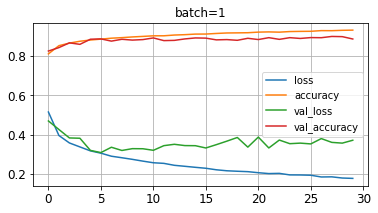

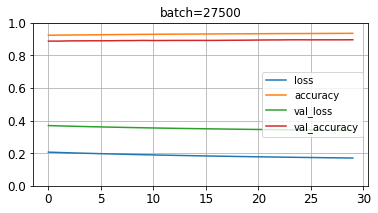

In [14]:
pd.DataFrame(history_batch1.history).plot(figsize=(6, 3),title=('batch=1'),grid=(True))
pd.DataFrame(history_batch27500.history).plot(figsize=(6, 3),title=('batch=27500'),grid=(True))
plt.gca().set_ylim(0, 1)
plt.show()

# Plot Learning curves when using different number of epochs

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
history_epoch10 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7169 - accuracy: 0.7657 - val_loss: 0.5084 - val_accuracy: 0.8286
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4900 - accuracy: 0.8296 - val_loss: 0.4366 - val_accuracy: 0.8516
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4447 - accuracy: 0.8449 - val_loss: 0.4518 - val_accuracy: 0.8368
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4175 - accuracy: 0.8547 - val_loss: 0.4009 - val_accuracy: 0.8630
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4001 - accuracy: 0.8599 - val_loss: 0.3871 - val_accuracy: 0.8664
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3834 - accuracy: 0.8650 - val_loss: 0.3793 - val_accuracy: 0.8664
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3696 - accuracy: 0.8701 - val_loss: 0.3721 - val_accuracy:

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8468


[0.42021694779396057, 0.8468000292778015]

In [21]:
history_epoch100 = model.fit(X_train, y_train, batch_size=32, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3311 - accuracy: 0.8817 - val_loss: 0.3480 - val_accuracy: 0.8776
Epoch 2/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3232 - accuracy: 0.8849 - val_loss: 0.3367 - val_accuracy: 0.8802
Epoch 3/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3150 - accuracy: 0.8872 - val_loss: 0.3312 - val_accuracy: 0.8824
Epoch 4/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3104 - accuracy: 0.8885 - val_loss: 0.3565 - val_accuracy: 0.8708
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3023 - accuracy: 0.8908 - val_loss: 0.3248 - val_accuracy: 0.8846
Epoch 6/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2957 - accuracy: 0.8942 - val_loss: 0.3296 - val_accuracy: 0.8834
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.8954 - val_loss: 0.3218 - val_ac

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8894


[0.4353627860546112, 0.8894000053405762]

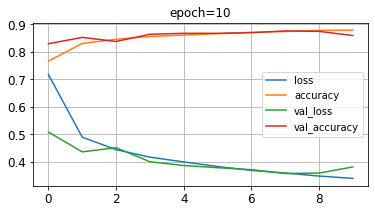

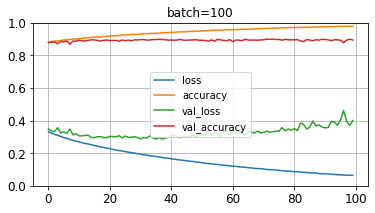

In [23]:
pd.DataFrame(history_epoch10.history).plot(figsize=(6, 3),title=('epoch=10'),grid=(True))
pd.DataFrame(history_epoch100.history).plot(figsize=(6, 3),title=('batch=100'),grid=(True))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 4) repeat with more layers

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(40, activation="selu"))
model.add(keras.layers.Dense(20, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [35]:
history_morelayer = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 1.4116 - accuracy: 0.5992 - val_loss: 0.9147 - val_accuracy: 0.7386
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7703 - accuracy: 0.7606 - val_loss: 0.6610 - val_accuracy: 0.7864
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5989 - accuracy: 0.8089 - val_loss: 0.5620 - val_accuracy: 0.8246
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5218 - accuracy: 0.8297 - val_loss: 0.4741 - val_accuracy: 0.8474
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4764 - accuracy: 0.8419 - val_loss: 0.4472 - val_accuracy: 0.8498
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4455 - accuracy: 0.8502 - val_loss: 0.4197 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4220 - accuracy: 0.8570 - val_loss: 0.4107 - val_accuracy:

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8754


[0.3609905242919922, 0.8754000067710876]

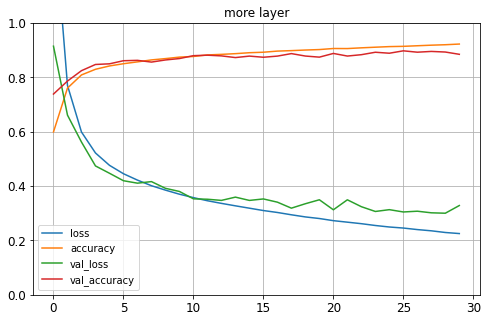

In [41]:
pd.DataFrame(history_morelayer.history).plot(figsize=(8, 5), title =('more layer'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 5) apply on different datasets

In [61]:
! pip install -q kaggle

In [62]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ismailameran","key":"938b12a2c98d7b24bd425f7a096913c4"}'}

In [63]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [64]:
! chmod 600 ~/.kaggle/kaggle.json

In [79]:
!kaggle datasets download -d gpreda/chinese-mnist

chinese-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [67]:
!pip install zip_files

In [80]:
!unzip chinese-mnist.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/data/input_6_6_5.jpg  
  inflating: data/data/input_6_6_6.jpg  
  inflating: data/data/input_6_6_7.jpg  
  inflating: data/data/input_6_6_8.jpg  
  inflating: data/data/input_6_6_9.jpg  
  inflating: data/data/input_6_7_1.jpg  
  inflating: data/data/input_6_7_10.jpg  
  inflating: data/data/input_6_7_11.jpg  
  inflating: data/data/input_6_7_12.jpg  
  inflating: data/data/input_6_7_13.jpg  
  inflating: data/data/input_6_7_14.jpg  
  inflating: data/data/input_6_7_15.jpg  
  inflating: data/data/input_6_7_2.jpg  
  inflating: data/data/input_6_7_3.jpg  
  inflating: data/data/input_6_7_4.jpg  
  inflating: data/data/input_6_7_5.jpg  
  inflating: data/data/input_6_7_6.jpg  
  inflating: data/data/input_6_7_7.jpg  
  inflating: data/data/input_6_7_8.jpg  
  inflating: data/data/input_6_7_9.jpg  
  inflating: data/data/input_6_8_1.jpg  
  inflating: data/data/input_6_8_10.jpg  
  inflating: data/data/input_6_8_11.jpg 

In [83]:
import os

In [86]:
IMAGE_PATH = '/content/data/data'
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64

In [87]:
image_files = list(os.listdir(IMAGE_PATH))
print("Number of image files: {}".format(len(image_files)))

Number of image files: 15000


In [89]:
os.listdir("/content/data")

['data', 'chinese_mnist.csv']

In [90]:
data_df=pd.read_csv('/content/data/chinese_mnist.csv')

In [94]:
data_df

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九
...,...,...,...,...,...
14995,99,5,9,8,八
14996,99,6,9,8,八
14997,99,7,9,8,八
14998,99,8,9,8,八


In [91]:
def create_file_name(x):
    
    file_name = f"input_{x[0]}_{x[1]}_{x[2]}.jpg"
    return file_name

In [49]:
X_valid, X_train = X_train_full[:1000] / 255., X_train_full[0000:] / 255.
y_valid, y_train = y_train_full[:1000], y_train_full[1000:]
X_test = X_test / 255.

In [51]:
X_valid.shape

(1000, 32, 32, 3)

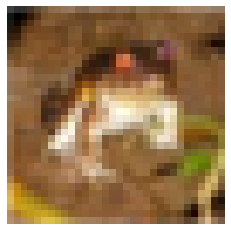

In [52]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

In [53]:
y_train

array([[9],
       [4],
       [3],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [55]:
y_train[0]

array([9], dtype=uint8)

In [45]:
class_names = ["airplane", "automobil", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]